In [2]:
from CaAttributes import CaNeighbourhoods, MemoryTypes, RuleTypes
import itertools
%load_ext autoreload
%autoreload 2
from CaMemory1D import CaMemory1D
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.decomposition import PCA
     
    
    
    

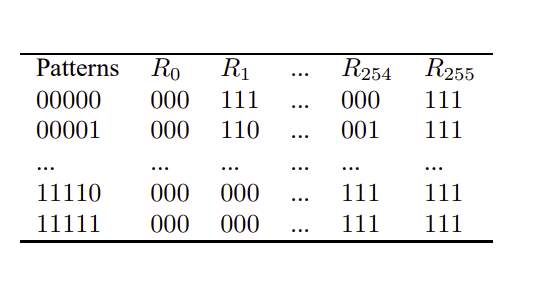

# Regular 

In [9]:
def step_all_rules(input_state, gridsize):
    n = len(input_state)
    results=[]
    for rule_num in range(256):
        new_state = [0] * n
        ca = CaMemory1D(grid_size=gridsize , rule_type=RuleTypes.Default,
                memory_type=MemoryTypes.Default )    
        ca.set_state_reset(input_state)
        ca.set_rule_number(rule_num)
        result=ca.step()    
        result=ca.step() 
        result=ca.step() 
        results.append(int(''.join(map(str, result)), 2))    
    return results
def step_all_rules_mem(input_state, gridsize):
    n = len(input_state)
    results=[]
    for rule_num in range(256):
        new_state = [0] * n
        ca = CaMemory1D(grid_size=gridsize , rule_type=RuleTypes.Default,
                memory_type=MemoryTypes.Most_Frequent )    
        ca.set_state_reset(input_state)
        ca.set_rule_number(rule_num)
        result=ca.step( )
        result=ca.step( )
        result=ca.step( )
        results.append(int(''.join(map(str, result)), 2))    
    return results
gridsize=5
x_values = [seq for seq in itertools.product("01", repeat=gridsize)]
x_values = [[int(bit) for bit in seq] for seq in x_values]
data_set=[]
for x_value in x_values:
    data_point=step_all_rules(x_value,gridsize)
     
    data_set.append(data_point)

df = pd.DataFrame(data_set ) 
matrix = np.array(df)

# Calculate the mean along each column (axis=0)
E = np.mean(matrix, axis=0)

# Subtract the mean from the data to center it
centered_data = matrix - E

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(centered_data, rowvar=True)

pca=PCA(n_components=12)
p_comp=pca.fit_transform(correlation_matrix)
np.set_printoptions(threshold=np.inf)

np.set_printoptions(suppress=True)

print(p_comp)


[[ 0.9597503   0.26822365  0.1715793  -0.52950439  0.19755569 -0.07536548
   0.41116485  0.51871288 -0.03996523  0.34858183 -0.11924871  0.05010981]
 [ 1.60785178 -0.37202459 -0.48798153 -0.15167049  0.40683423  0.31029467
   0.18825477 -0.1282997   0.14533598 -0.0354323   0.0355247  -0.08858027]
 [ 1.40845443 -0.31135386 -0.31520551  0.2060776   0.39345931  0.12952415
   0.16838965 -0.44840397 -0.36442694  0.21993399 -0.01940521 -0.07648155]
 [ 0.78840281 -0.45207688  0.53723163  0.49200588 -0.52286081  0.54094961
   0.40981956 -0.04783177  0.1185394   0.02158536 -0.23875564 -0.04049615]
 [ 1.47866937 -0.32207316 -0.36370632 -0.05422479  0.4452491  -0.47255865
   0.07987489 -0.24631478 -0.13717648  0.05202329 -0.12399279 -0.20164075]
 [ 1.12198945  0.81297411  0.03738342  0.54258752 -0.22177512 -0.18108019
  -0.06728513 -0.19225939  0.3042874  -0.06909671 -0.18633095  0.03266447]
 [ 0.56878136 -0.63896171  0.55361416  0.37454676 -0.35407956 -0.46450942
   0.5003477   0.07822508 -0.204

# Memory

In [10]:
correlation_matrix

array([[ 1.        ,  0.16697   ,  0.03994646, -0.016041  ,  0.12957695,
         0.02888475,  0.17090413, -0.27389567,  0.2950804 ,  0.12917121,
         0.05055077, -0.05848623, -0.06583133, -0.04143245, -0.25373593,
        -0.26404982,  0.31667062,  0.03311407,  0.03370097, -0.19727801,
         0.08164531, -0.08004379, -0.12017309, -0.30806202,  0.05403584,
        -0.2232168 , -0.08185799, -0.28000796, -0.16755221, -0.25178784,
        -0.32270496, -0.17747673],
       [ 0.16697   ,  1.        ,  0.55835474,  0.1467218 ,  0.39770699,
         0.12115804, -0.0261246 ,  0.14251028,  0.52462746,  0.24087693,
         0.09878875, -0.21004421, -0.05319262, -0.33709351, -0.03658571,
        -0.32482253,  0.52073454,  0.01370362,  0.0866381 , -0.01068725,
         0.01362327, -0.34131587, -0.38415572, -0.37002541, -0.04216703,
         0.00734366, -0.33403383, -0.25348453, -0.24043633, -0.28615982,
        -0.415746  , -0.32270496],
       [ 0.03994646,  0.55835474,  1.        ,  0.1738

In [81]:
for x_value in x_values:
    data_point=step_all_rules_mem(x_value,gridsize)
     
    data_set.append(data_point)

df = pd.DataFrame(data_set ) 
matrix=np.array(df)
E = np.mean(matrix, axis=0)  
matrix.shape
F=matrix.T-E[:, np.newaxis]
X=F.T

pca=PCA(n_components=40)
p_comp_mem=pca.fit_transform(df)
np.set_printoptions(suppress=True)

print(p_comp_mem)


[[ 125.6    89.55  106.86  109.34   10.2   -34.94   -0.     49.71   -0.32
    14.45   30.36    0.      1.51    0.      0.      5.07   -0.     -0.
    -2.27    0.     -4.17   -4.51    4.34    0.      3.22    0.     -6.33
     0.     -0.      0.65    0.      0.      0.     -0.      0.      0.
     0.      0.      0.      0.  ]
 [  78.53  -26.45  -25.19   11.31   35.51   35.27   28.85    1.85   16.96
     2.69  -16.79    4.71  -21.28   -9.69    8.45   -3.98   35.04  -30.55
   -25.76    7.52    1.44  -17.12    0.73  -11.51   -8.69   -9.59    5.99
    -5.52    6.46   13.36    3.43    0.      0.     -0.      0.     -0.
    -0.     -0.     -0.      0.  ]
 [  67.47  -29.3   -41.3     0.9    11.77   45.57   14.56   18.03  -53.9
    56.54  -21.3    12.98  -19.19  -16.93   15.57   -3.35   -2.17    1.1
     4.38    9.09  -10.32    2.71   15.73    4.39   10.1     8.65   -1.66
    12.35  -13.19   -4.89   -6.34   -0.      0.     -0.     -0.     -0.
     0.     -0.      0.      0.  ]
 [  32.24  -33.25

In [73]:
print(p_comp_mem[0])

[ 125.6    89.55 -106.86  109.34  -10.2   -34.94    0.    -49.71    0.32
   14.45   30.36   -0.  ]
